In [1]:
import pandas as pd
df = pd.read_csv("titanic-passengers.csv", sep=";", encoding="ISO8859-1")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

df['Cabin'].fillna('G6', inplace = True)

df['Embarked'].fillna('S', inplace = True)

In [3]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [4]:
df["Sex"]=df["Sex"].map({"male":1, "female":0})
df["Survived"]=df["Survived"].map({"Yes":1, "No":0})

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


# Logistic regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=df[['Pclass','Sex', 'Age','Fare']] #features dataset
y=df['Survived'] #label dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=5) #splittinf
logreg=LogisticRegression() #instance de la regression logistique
logreg.fit(x_train, y_train) #trainning
y_pred=logreg.predict(x_test) #predicted output
lr = logreg.score(x_test,y_test)
logreg.score(x_test,y_test) #score au test

0.7597765363128491

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

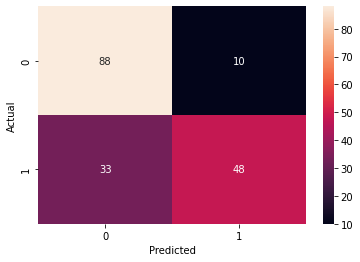

In [9]:
import seaborn as sns
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=LogisticRegression()
clf.fit(x_train, y_train) #Training
y_pred=clf.predict(x_test) #Predict
pred_prob=clf.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:, 1]) #Score AUC 

0.8453640715545477

/home/alle/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


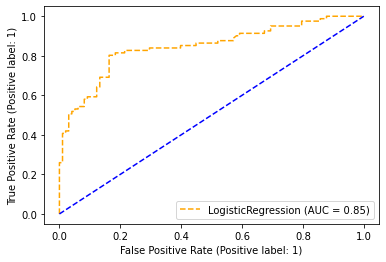

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Visualisation de la courbe ROC
metrics.plot_roc_curve(clf, x_test, y_test, linestyle='--', color='orange')
#Courbe ROC pour fpr=tpr
random_probs = [0 for i in range(len(y_test))] #Génère des 0 y_test fois
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.show()

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy=',accuracy_score(y_pred,y_test))

Accuracy= 0.6759776536312849


In [15]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.7
Accuracy for k= 2 is: 0.69
Accuracy for k= 3 is: 0.67
Accuracy for k= 4 is: 0.68
Accuracy for k= 5 is: 0.69
Accuracy for k= 6 is: 0.68
Accuracy for k= 7 is: 0.68
Accuracy for k= 8 is: 0.68
Accuracy for k= 9 is: 0.68
Accuracy for k= 10 is: 0.68
Accuracy for k= 11 is: 0.69
Accuracy for k= 12 is: 0.69
Accuracy for k= 13 is: 0.69
Accuracy for k= 14 is: 0.7
Accuracy for k= 15 is: 0.69
Accuracy for k= 16 is: 0.7
Accuracy for k= 17 is: 0.68
Accuracy for k= 18 is: 0.69
Accuracy for k= 19 is: 0.7
Accuracy for k= 20 is: 0.7
Accuracy for k= 21 is: 0.73
Accuracy for k= 22 is: 0.71
Accuracy for k= 23 is: 0.72
Accuracy for k= 24 is: 0.69
Accuracy for k= 25 is: 0.73
Accuracy for k= 26 is: 0.71
Accuracy for k= 27 is: 0.72
Accuracy for k= 28 is: 0.65
Accuracy for k= 29 is: 0.68


In [22]:
kn = scores[21]

# Decision tree and random forest

In [26]:
#importing relevant libraries
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
#features extraction
x=df[['Pclass','Sex', 'Age','Fare']] #features dataset
y=df['Survived'] #label dataset
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
score1=accuracy_score(y_test, y_pred)
print("score1:{}".format(accuracy_score(y_test, y_pred)))

score1:0.7877094972067039


In [27]:
tree2 = tree.DecisionTreeClassifier(criterion="entropy", splitter="random")  
tree2.fit(x_train, y_train)   #fitting our model
y_pred=tree2.predict(x_test)   # evaluating our model
score2=accuracy_score(y_test, y_pred)
print("score2:{}".format(accuracy_score(y_test, y_pred)))

score2:0.8156424581005587


In [28]:
dt = score2

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=90)  #Creating a random forest
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
rf=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8491620111731844


# Summary graph

Text(0, 0.5, 'Accuracy')

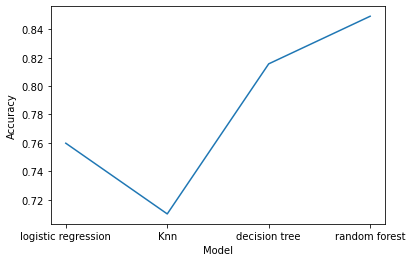

In [38]:
plt.plot(['logistic regression','Knn','decision tree', 'random forest'],[lr, kn, dt, rf])
plt.xlabel('Model')
plt.ylabel('Accuracy')